### Example of using aodn catalog

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import rompy
from utilfuncs import scatter
import xarray as xr
xr.set_options(display_style='text')

*As SAR/altimetry points contain only list of points but no data, this plot needs to be done with SAR/altimetry xarray driver

### SAR data

In [3]:
ds_sar=rompy.cat.aodn.nrt_wave_sar(startdt='2021-02-25',
                                   enddt='2021-04-29',
                                   geom='POLYGON ((100.0000000000000000 -35.0000000000000000, 100.0000000000000000 -28.5000000000000000, 119.8000030517578125 -28.5000000000000000, 119.8000030517578125 -35.0000000000000000, 100.0000000000000000 -35.0000000000000000))',
                                   ds_filters={'subset':['HS_PART'],'sort':['TIME']}).to_dask()
ds_sar

/home/rfonsecadasilva/anaconda3/envs/rompy-dev/lib/python3.7/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


<xarray.Dataset>
Dimensions:    (PARTITION: 5, TIME: 409)
Coordinates:
  * PARTITION  (PARTITION) int8 0 1 2 3 4
    LATITUDE   (TIME) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    LONGITUDE  (TIME) float32 dask.array<chunksize=(1,), meta=np.ndarray>
  * TIME       (TIME) datetime64[ns] 2021-02-25T11:07:33.000010496 ... 2021-0...
Data variables:
    HS_PART    (TIME, PARTITION) float32 dask.array<chunksize=(1, 5), meta=np.ndarray>
Attributes:
    Conventions:                     CF-1.6,IMOS-1.4
    abstract:                        Sentinel-1 A and B satellites are part o...
    acknowledgement:                 Any users of IMOS data are required to c...
    author:                          Khan, Salman Saeed
    author_email:                    salmansaeed.khan@csiro.au
    citation:                        The citation in a list of references is:...
    data_centre:                     Australian Ocean Data Network (AODN)
    data_centre_email:               info@aodn.org.au
    date_created:                    2021-02-26T00:04:33Z
    date_modified:                   2021-02-26T00:04:33Z
    disclaimer:                      Data, products and services from IMOS ar...
    geospatial_lat_max:              61.187904
    geospatial_lat_min:              -75.019806
    geospatial_lon_max:              179.7234
    geospatial_lon_min:              -179.54887
    geospatial_vertical_max:         0.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_negative:    down
    institution:                     CSIRO
    license:                         http://creativecommons.org/licenses/by/4.0/
    naming_authority:                IMOS
    principal_investigator:          Hemer, Mark
    principal_investigator_email:    mark.hemer@csiro.au
    project:                         Integrated Marine Observing System (IMOS)
    source:                          Copernicus Australasia
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    time_coverage_end:               2021-02-25T08:56:43Z
    time_coverage_start:             2021-02-24T07:57:12Z
    title:                           Sentinel-1 B C-SAR surface wave spectra
    DODS_EXTRA.Unlimited_Dimension:  TIME

### SAR - lat/lon scatter plot coloured by Hs

(<Figure size 720x1895.76 with 2 Axes>, <GeoAxesSubplot:>)

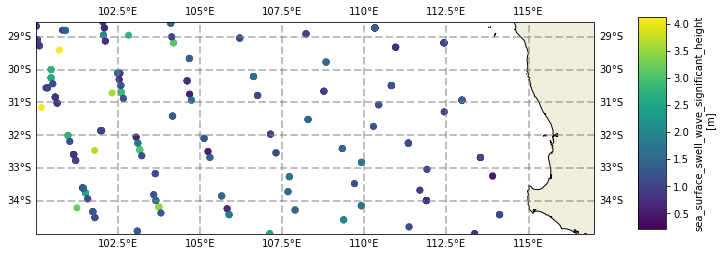

In [4]:
scatter(ds_sar.isel(PARTITION=0,drop=True),color='HS_PART',maxLon=117)

### SAR - lat/lon scatter plot coloured by time

/mnt/d/Renan/Renan-PhD/NLGP/repos/rompy/Notebooks/utilfuncs.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  if color=='TIME': cb.ax.set_yticklabels([(datetime.fromtimestamp(i// 10**9)).strftime('%b %d %Y') for i in cb.get_ticks()])


(<Figure size 720x1895.76 with 2 Axes>, <GeoAxesSubplot:>)

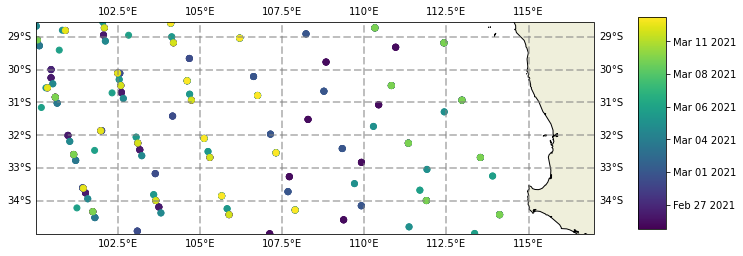

In [5]:
scatter(ds_sar.isel(PARTITION=0,drop=True),color='TIME',maxLon=117)

### SAR - time series plot of Hs

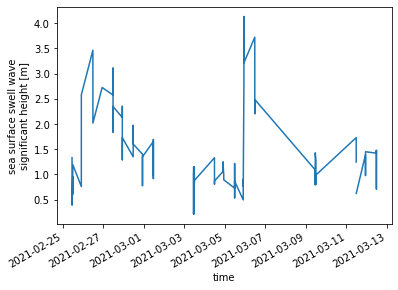

In [6]:
ds_sar.isel(PARTITION=0,drop=True).HS_PART.plot()

### altimetry data

In [7]:
ds_alt=rompy.cat.aodn.nrt_wave_altimetry(startdt='2020-02-03',
                                         enddt='2020-02-04',
                                         geom='POLYGON ((111.0000000000000000 -33.0000000000000000, 111.0000000000000000 -30.0000000000000000, 115.8000030517578125 -31.5000000000000000, 115.8000030517578125 -33.0000000000000000, 111.0000000000000000 -33.0000000000000000))',
                                         ds_filters={'subset':['SWH_C'],'sort':['TIME']}).to_dask()
ds_alt

/home/rfonsecadasilva/anaconda3/envs/rompy-dev/lib/python3.7/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


<xarray.Dataset>
Dimensions:    (TIME: 99)
Coordinates:
  * TIME       (TIME) datetime64[ns] 2020-02-03T02:12:33.999997312 ... 2020-0...
    LATITUDE   (TIME) float32 dask.array<chunksize=(17,), meta=np.ndarray>
    LONGITUDE  (TIME) float32 dask.array<chunksize=(17,), meta=np.ndarray>
Data variables:
    SWH_C      (TIME) float32 dask.array<chunksize=(17,), meta=np.ndarray>
Attributes:
    abstract:                      This database contains global data of wind...
    acknowledgement:               Any users of IMOS data are required to cle...
    author_email:                  agus.ribal@gmail.com
    author:                        Ribal, Agustinus
    citation:                      The citation in a list of references is: "...
    Conventions:                   CF-1.6,IMOS-1.4
    data_centre:                   Australian Ocean Data Network (AODN)
    data_centre_email:             info@aodn.org.au
    date_created:                  2021-01-04T07:12:21Z
    date_modified:                 2021-01-04T07:12:21Z
    disclaimer:                    Data, products and services from IMOS are ...
    geospatial_lon_max:            111.72843
    geospatial_lon_min:            111.15321
    geospatial_lat_max:            -32.00088
    geospatial_lat_min:            -32.999817
    geospatial_vertical_max:       0.0
    geospatial_vertical_min:       0.0
    geospatial_vertical_negative:  down
    institution:                   The University of Melbourne
    license:                       http://creativecommons.org/licenses/by/4.0/
    naming_authority:              IMOS
    principal_investigator_email:  ian.young@conviro.com.au
    principal_investigator:        Young, Ian
    project:                       Integrated Marine Observing System (IMOS)
    source:                        RADS
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    time_coverage_start:           2016-03-20T14:56:37Z
    time_coverage_end:             2020-12-13T02:11:50Z
    title:                         SENTINEL-3A altimeter wave/wind data

### altimetry - lat/lon scatter plot coloured by Hs

(<Figure size 720x1454.34 with 2 Axes>, <GeoAxesSubplot:>)

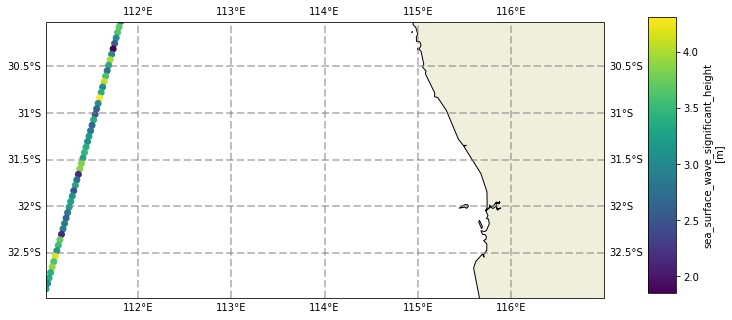

In [8]:
scatter(ds_alt,color='SWH_C',maxLon=117)

### altimetry - lat/lon scatter plot coloured by time

/mnt/d/Renan/Renan-PhD/NLGP/repos/rompy/Notebooks/utilfuncs.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  if color=='TIME': cb.ax.set_yticklabels([(datetime.fromtimestamp(i// 10**9)).strftime('%b %d %Y') for i in cb.get_ticks()])


(<Figure size 720x1454.34 with 2 Axes>, <GeoAxesSubplot:>)

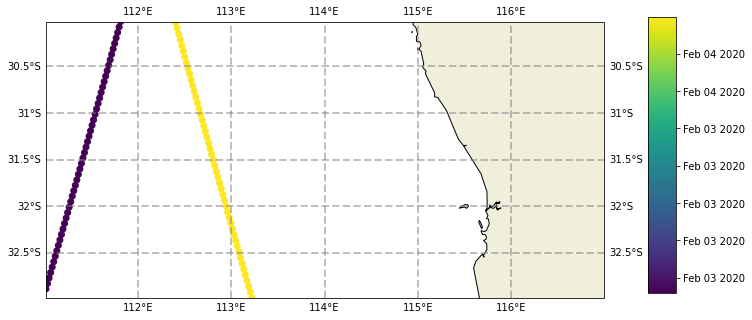

In [9]:
scatter(ds_alt,color='TIME',maxLon=117)

### altimetry - time series plot of Hs

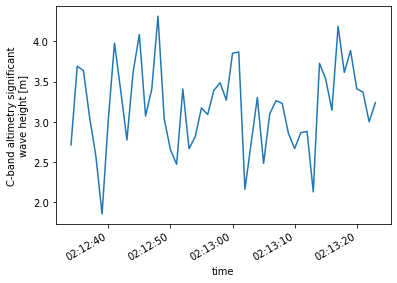

In [10]:
ds_alt.SWH_C.plot()